> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [111]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
general 
1. Since move genre name includes movie genre name includes '|', I deleted '|' and used movie genre category name such as action, adventure..etc.

In [112]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

movie_data = pd.read_csv('tmdb-movies.csv')

In [9]:
movie_data.popularity.isnull().sum()

0

In [98]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [99]:
movie_data.release_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10866, dtype: int64

In [ ]:
movie_data.genres

In [11]:
df = movie_data.drop('genres', axis=1).join(movie_data['genres'].str.split('|', expand=True).stack().reset_index(level=1,drop=True).rename('genres'))

In [12]:
df.genres

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: genres, Length: 26983, dtype: object

In [92]:
df.groupby(['release_year','genres']).popularity.mean().head(10)

release_year  genres   
1960          Action       0.590724
              Adventure    0.700981
              Comedy       0.396000
              Crime        0.346480
              Drama        0.566305
              Family       0.278064
              Fantasy      0.428247
              Foreign      0.194948
              History      0.412364
              Horror       0.591450
Name: popularity, dtype: float64

In [ ]:
df.groupby(['release_year','genres']).popularity.hist(bins=100, xlabelsize=12, ylabelsize=12,alpha = 0.5)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1. Which genres are most popular from year to year?

### The most popular genre has changed year to year.
#### 1966 Fantasy > 1970 Anmiation > 1974 Mystery > 1978 Crime > 1982 Crime > 1986 Adventure > 1990 War > 1994 Animation.. >2000 Adventure > 2015 Adventure

[How to measure]
1. Movie genres were categorized with below 20 items.
'Science Fiction', 'Mystery', 'Adventure', 'Horror', 'Crime',
'Drama', 'Thriller', 'Action', 'Comedy', 'Family', 'Fantasy',
'History', 'Animation', 'Music', 'Western', 'War', 'Romance',
'Foreign', 'Documentary', 'TV Movie'
2. Since many movies are released every year in one genre, I calculated the popularity of the movie genre with 'median' value in each year.


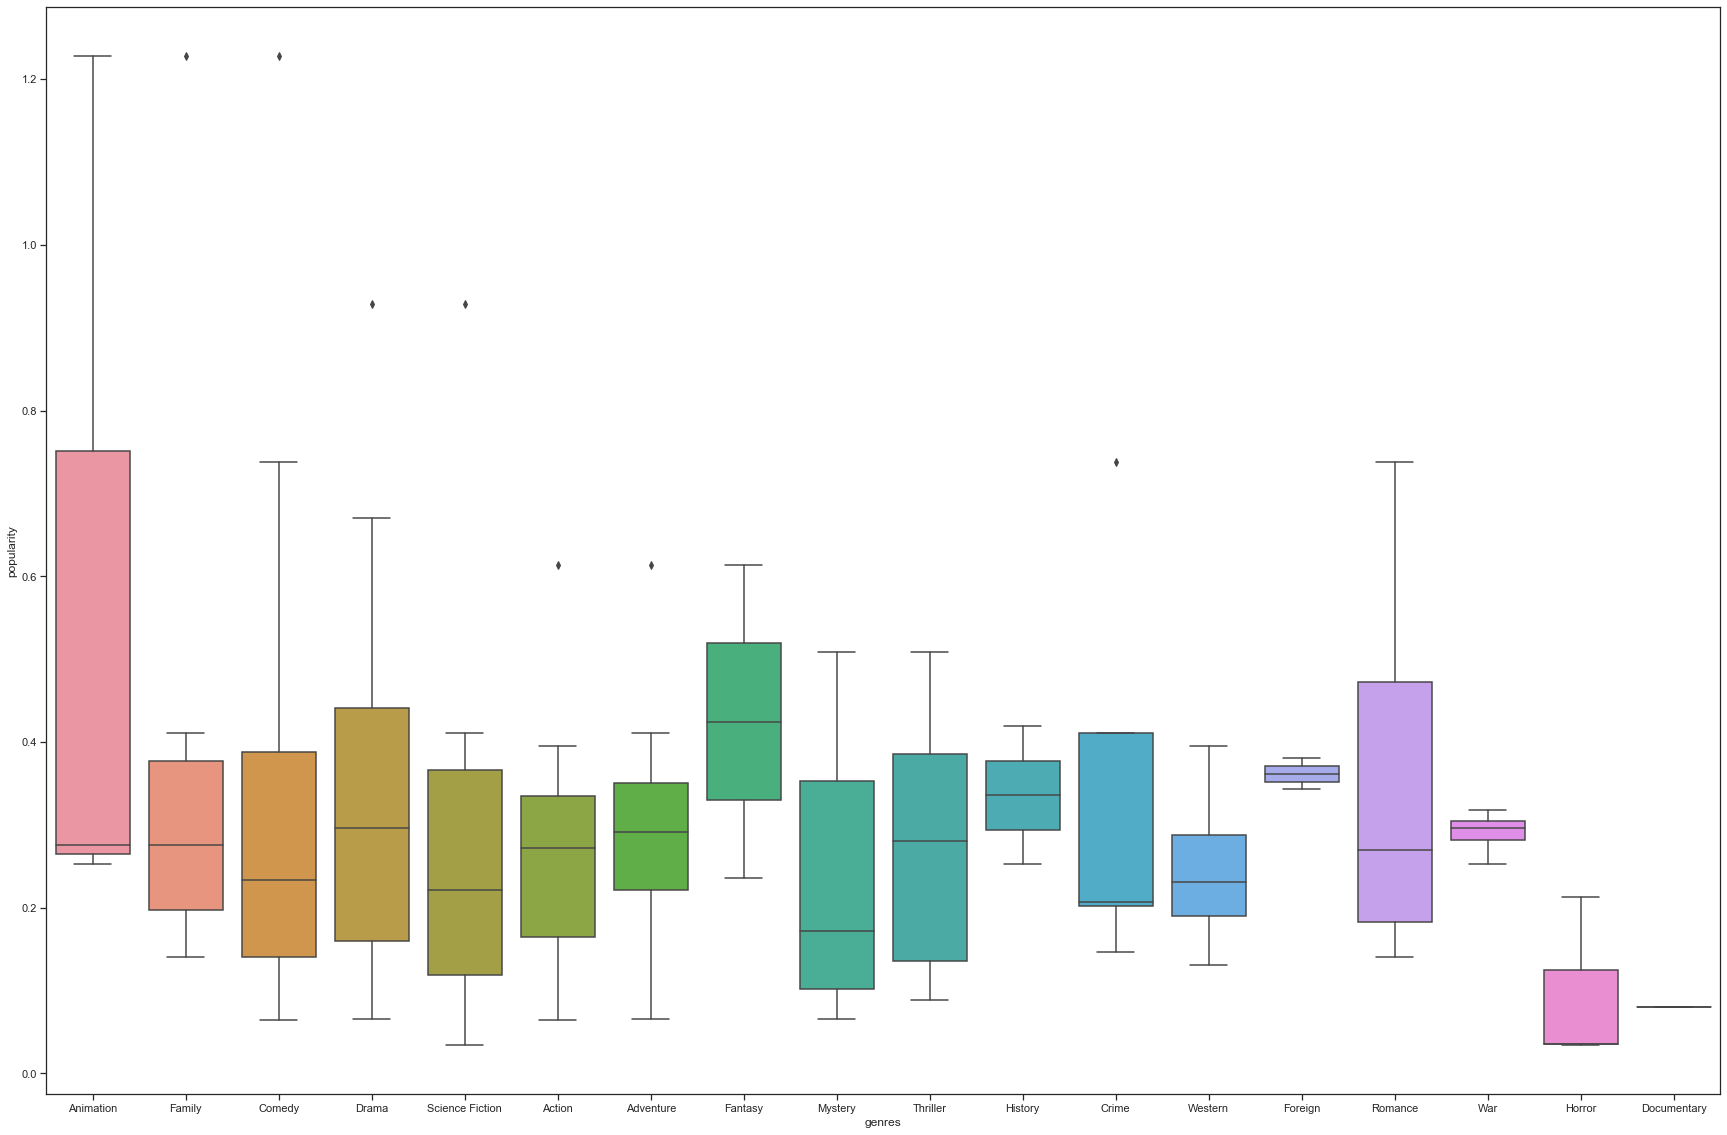

In [144]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df[df.release_year == 1966], x="genres", y="popularity")

In [134]:
df[df.release_year == 1966].groupby('genres').median()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,20053.5,0.272052,0.0,0.0,118.5,14.5,5.85,1966.0,0.0,0.0
Adventure,19728.0,0.291704,0.0,0.0,108.0,17.0,5.80,1966.0,0.0,0.0
Animation,13377.0,0.276133,0.0,0.0,25.0,49.0,7.20,1966.0,0.0,0.0
Comedy,14487.5,0.233486,0.0,0.0,106.5,14.5,6.10,1966.0,0.0,0.0
Crime,26268.0,0.206537,0.0,0.0,121.0,17.0,6.00,1966.0,0.0,0.0
Documentary,21.0,0.080598,0.0,0.0,95.0,11.0,7.40,1966.0,0.0,0.0
Drama,15472.5,0.295808,0.0,0.0,120.5,19.0,6.25,1966.0,0.0,0.0
Family,13377.0,0.276133,0.0,0.0,90.0,15.0,6.60,1966.0,0.0,0.0
Fantasy,13659.5,0.424771,0.0,0.0,104.0,15.0,5.60,1966.0,0.0,0.0


### Research Question 2. What kinds of properties are associated wtih movies that have high revenue? 

In [137]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'genres'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE1642288>,
      dtype=object)

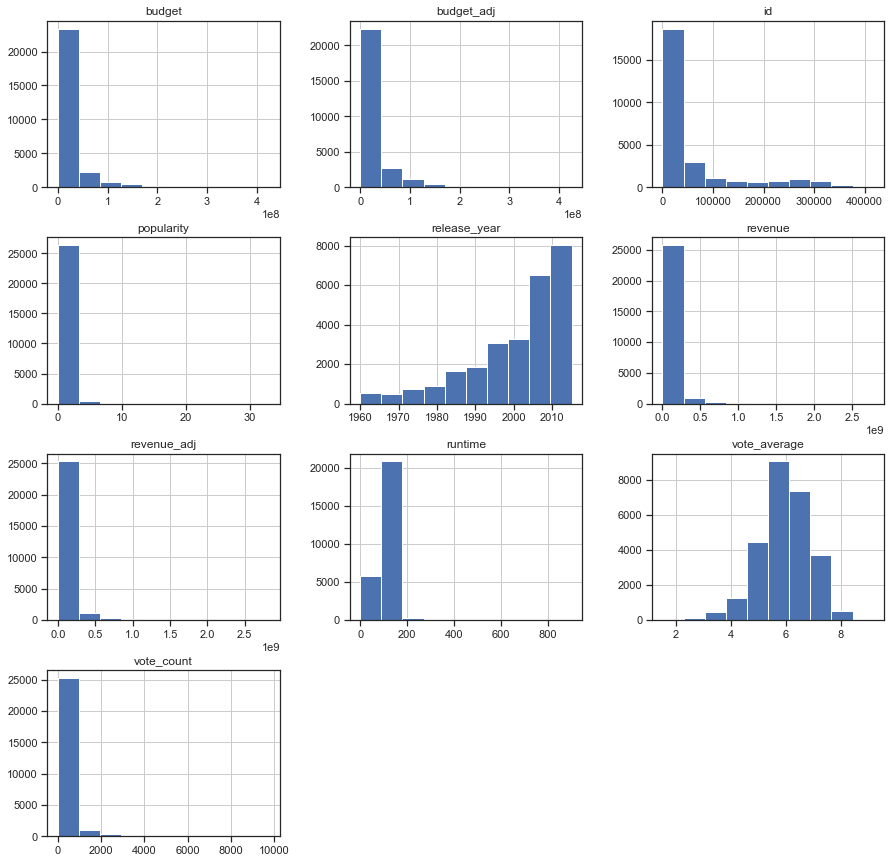

In [141]:
df.hist(figsize=(15,15))

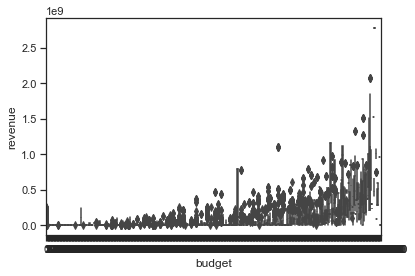

In [142]:
sns.boxplot(data=df, x="budget", y="revenue")

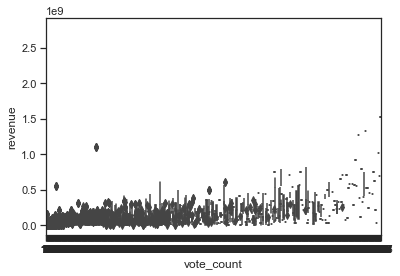

In [143]:
sns.boxplot(data=df, x="vote_count", y="revenue")

In [ ]:
sns.boxplot(data=df, x="popularity", y="revenue")

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### 1. When measuring popularity via median popularity of the movies, the most popular movie genre has changed over the years. 
### 2. When looking at the patterns, we can assume that movie revenue is associated with its budget.